# Preprocessing for word2Vec WordCloud Tab

In [3]:
import pandas as pd
import sqlite3 as sql

conn = sql.connect('data/tweets.db')
twits = pd.read_sql('SELECT COUNT(DISTINCT(ID)) AS num_tweets FROM tweets ORDER BY created_at DESC', conn)
twits


,num_tweets
0,17100


In [4]:
tweets_all = pd.read_sql('SELECT DISTINCT * FROM tweets ORDER BY created_at ASC', conn)
conn.close()
tweets_all.head(10)

,ID,text,created_at,lang
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en


In [5]:
tweets_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17100 non-null  int64 
 1   text        17100 non-null  object
 2   created_at  17100 non-null  object
 3   lang        17100 non-null  object
dtypes: int64(1), object(3)
memory usage: 534.5+ KB


In [6]:
# RegEx Extraction of hashtags
import re

tweets_all['hashtag'] = tweets_all['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [7]:
import preprocessor as p
# cleaned tweet feature:
for i, t in enumerate(tweets_all['text']):
    tweets_all.loc[i, 'clean_text'] = p.clean(t)

In [8]:
tweets_all.head(10)

,ID,text,created_at,lang,hashtag,clean_text
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en,[],: WHO'S READY TO PARTY?!Join us for my Twitch ...
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en,[],Dude ate mad Taco Bell last night
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en,[],your current orange logo looks like a taco bel...
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en,[],trans day of letting the uber eats guy hit the...
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...


In [9]:
def zeroPunct(data):
    new_text = []
    for doc in data:
        new_doc = re.sub(r'[^\w\s]', '', (doc))
        new_text.append(new_doc)
    return new_text

In [10]:
# Digit removal, force text to lowercase
data = tweets_all['clean_text']
data = data.astype(str).str.replace('\d+', '')
data = data.str.lower()

tweets_all['no_puncts'] = zeroPunct(data)
tweets_all.head(10)

/var/folders/r5/kwzghqz92v73843mkcq0vhp40000gn/T/ipykernel_1018/3635669307.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+', '')


,ID,text,created_at,lang,hashtag,clean_text,no_puncts
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en,[],: WHO'S READY TO PARTY?!Join us for my Twitch ...,whos ready to partyjoin us for my twitch part...
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en,[],Dude ate mad Taco Bell last night,dude ate mad taco bell last night
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en,[],your current orange logo looks like a taco bel...,your current orange logo looks like a taco bel...
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en,[],trans day of letting the uber eats guy hit the...,trans day of letting the uber eats guy hit the...
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...


In [11]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /Users/ben/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ben/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
lemmatizer = WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemma(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

In [13]:
docs = tweets_all['no_puncts']

words = docs.apply(lemma)

In [14]:
words.head(10)

0    [who, ready, to, partyjoin, u, for, my, twitch...
1    [the, three, thing, tyler, joseph, is, passion...
2            [dude, ate, mad, taco, bell, last, night]
3    [the, three, thing, tyler, joseph, is, passion...
4    [your, current, orange, logo, look, like, a, t...
5    [the, three, thing, tyler, joseph, is, passion...
6    [trans, day, of, letting, the, uber, eats, guy...
7    [the, three, thing, tyler, joseph, is, passion...
8    [the, three, thing, tyler, joseph, is, passion...
9    [the, three, thing, tyler, joseph, is, passion...
Name: no_puncts, dtype: object

In [15]:
tweets_all['clean_words'] = words
tweets_all.head(10)

,ID,text,created_at,lang,hashtag,clean_text,no_puncts,clean_words
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en,[],: WHO'S READY TO PARTY?!Join us for my Twitch ...,whos ready to partyjoin us for my twitch part...,"[who, ready, to, partyjoin, u, for, my, twitch..."
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en,[],Dude ate mad Taco Bell last night,dude ate mad taco bell last night,"[dude, ate, mad, taco, bell, last, night]"
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en,[],your current orange logo looks like a taco bel...,your current orange logo looks like a taco bel...,"[your, current, orange, logo, look, like, a, t..."
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en,[],trans day of letting the uber eats guy hit the...,trans day of letting the uber eats guy hit the...,"[trans, day, of, letting, the, uber, eats, guy..."
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."


In [16]:
stops = set(stopwords.words('english'))
tweets_all['clean_tokens'] = tweets_all['clean_words'].apply(lambda x: [w for w in x if w not in stops])

In [17]:
tweets_all[['clean_text', 'no_puncts', 'clean_words', 'clean_tokens']].head(10)

,clean_text,no_puncts,clean_words,clean_tokens
0,: WHO'S READY TO PARTY?!Join us for my Twitch ...,whos ready to partyjoin us for my twitch part...,"[who, ready, to, partyjoin, u, for, my, twitch...","[ready, partyjoin, u, twitch, partnerversary, ..."
1,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
2,Dude ate mad Taco Bell last night,dude ate mad taco bell last night,"[dude, ate, mad, taco, bell, last, night]","[dude, ate, mad, taco, bell, last, night]"
3,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
4,your current orange logo looks like a taco bel...,your current orange logo looks like a taco bel...,"[your, current, orange, logo, look, like, a, t...","[current, orange, logo, look, like, taco, bell..."
5,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
6,trans day of letting the uber eats guy hit the...,trans day of letting the uber eats guy hit the...,"[trans, day, of, letting, the, uber, eats, guy...","[trans, day, letting, uber, eats, guy, hit, bl..."
7,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
8,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
9,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."


In [18]:
clean_tweets = tweets_all[['ID', 'created_at', 'clean_words', 'clean_tokens']]

In [19]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            17100 non-null  int64 
 1   created_at    17100 non-null  object
 2   clean_words   17100 non-null  object
 3   clean_tokens  17100 non-null  object
dtypes: int64(1), object(3)
memory usage: 534.5+ KB


In [20]:
clean_tweets.to_json('data/tokens.json')

In [22]:
all_tokens = pd.read_json('data/tokens.json')
all_tokens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17100 entries, 0 to 17099
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ID            17100 non-null  int64              
 1   created_at    17100 non-null  datetime64[ns, UTC]
 2   clean_words   17100 non-null  object             
 3   clean_tokens  17100 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 668.0+ KB


In [23]:

from gensim.models import word2vec

# Separate tokenized tweets from the remainder of the DataFrame
tokenized_tweets = [doc for doc in all_tokens['clean_tokens']]

# Set parameter values
feature_size = 100
window_ctxt = 25
min_word_count = 3
sample = 1e-3

# Define model
word2vec_model = word2vec.Word2Vec(tokenized_tweets, vector_size=feature_size, window=window_ctxt,
                                  min_count=min_word_count, sample=sample, epochs=100)

In [115]:
search_term = 'love'
sims = [item[0] for item in word2vec_model.wv.most_similar([search_term], topn=20)]

sims

['vlog',
 'birthday',
 'share',
 'thank',
 'name',
 'wonderful',
 'appreciate',
 'bizarre',
 'friendly',
 'ignored',
 'agree',
 'crunchy',
 'nearby',
 'nail',
 'option',
 'sort',
 'thankful',
 'explain',
 'elon',
 'considering']

In [28]:
from sklearn.manifold import TSNE
import numpy as np

terms = sum([[k] + v for k, v in sims.items()], [])
wvs = word2vec_model.wv[terms]

# watch_terms = sum([[k] + v for k, v in sims.items()], [])
# wvs2 = word2vec_model.wv[watch_terms]

In [29]:
tsne = TSNE(n_components=3, random_state=42, n_iter=10000, perplexity=20)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = terms

/Users/ben/Benborg/ads_tweetapp/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ben/Benborg/ads_tweetapp/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


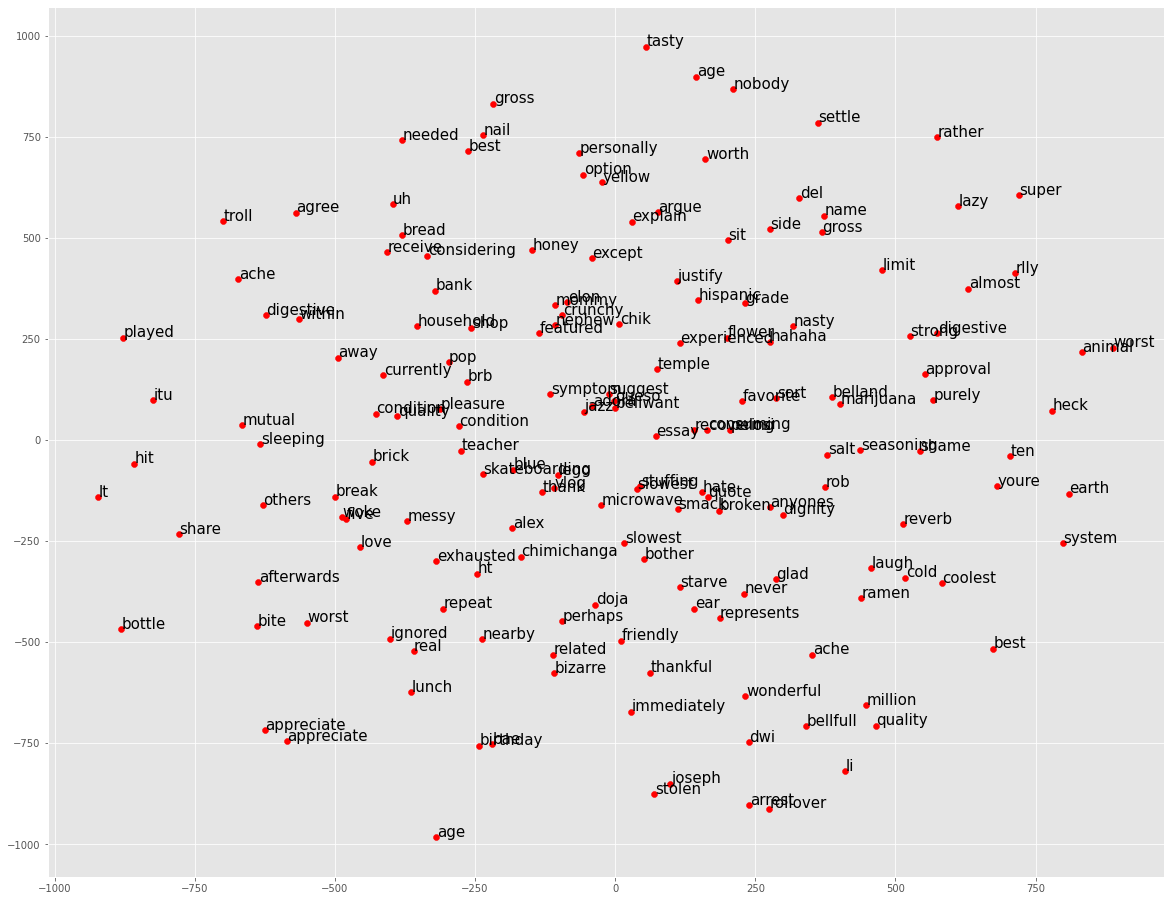

In [32]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 16))


ax.scatter(T[:, 0], T[:, 1], c='red')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    ax.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=15)
    
plt.show()

In [78]:
hash_sr = tweets_all['hashtag']
hash_sr.describe()

count     17100
unique      354
top          []
freq      16576
Name: hashtag, dtype: object

In [80]:
for g in range(len(hash_sr)):
    if len(hash_sr[g]) > 0:
        tweets_all['clean_words'].append(hash_sr[g])

AttributeError: 'list' object has no attribute 'item'

In [34]:
# hash_list = [h[i] for i in range(len(h)) for h in hash_sr if len(h) > 0]
hash_list = []
for i in range(len(hash_sr)):
    if len(hash_sr[i]) > 0:
        n = len(hash_sr[i])
        for j in range(n):
            hash_list.append(hash_sr[i][j])

In [36]:
hash_list[10:30], len(hash_list)

(['LesserKnownRivalries',
  'PokemonShiningPearl',
  'NintendoSwitch',
  'tacobelleveryday',
  'SatMat',
  'SHIB',
  'SHIBARMY',
  'shibainucoin',
  'SHIBNATION',
  '1CentDream',
  'tacobell',
  'tacobell',
  'crisps',
  'tortilla',
  'chips',
  'cheese',
  'blackfriday',
  'ad',
  'louderspace',
  'TacoBellEquity'],
 979)

In [37]:
uni_hash = pd.unique(hash_list)

In [39]:
uni_hash.shape, type(uni_hash)

((599,), numpy.ndarray)

In [67]:
uni_hash_df = pd.DataFrame(uni_hash)
uni_hash_df.to_csv('data/hashtag_df.csv')

### Choose 25-30 hashtags to use in selector


In [71]:
select_hashtags = ['wasteful', 'crisps', 'ToxicAttraction', 'bringitback', 'Biden', 'Trump', 'Election2020', 'funny', 'tacohell', 'Chihuahua', 'NeverForget', 'PizzaHutofPain', 'yummy', 'GetVaccinated', 'ThenThingsWentOffTheRails', 'MeatCute', 'excited', 'TacoTuesday', 'MoreSignsOfTheApocalypse', 'ghost', 'LiveForTheCheese', 'mexicanpizza', 'nj', 'cryptos', 'nft', 'Florida', 'firstworldproblems', 'McDonalds', 'chipotle', 'tacobellcanada', 'BlackFriday', 'Metaverse', 'Covid', 'happy', 'truelove']

sort_hashtags = sorted(select_hashtags)
sort_hashtags[0:10]

['Biden',
 'BlackFriday',
 'Chihuahua',
 'Covid',
 'Election2020',
 'Florida',
 'GetVaccinated',
 'LiveForTheCheese',
 'McDonalds',
 'MeatCute']

## Menu Item WordCloud

In [103]:
menu_items = ['5-Layer Burrito', '7-Layer Burrito', 'Burrito Supreme', 'Fresco Bean Burrito', 'Chalupa Supreme', 'Border Sauce', 'Fiesta Salsa', 'Fresco', 'Gordita', 'Nachos', 'Mexican', 'Enchirito', 
                'Meximelt', 'Mexican Pizza', 'Taco', 'Volcano']

menu_low = [item.lower() for item in menu_items]
menu_item_select = sorted(menu_low)
menu_item_select

['5-layer burrito',
 '7-layer burrito',
 'border sauce',
 'burrito supreme',
 'chalupa supreme',
 'enchirito',
 'fiesta salsa',
 'fresco',
 'fresco bean burrito',
 'gordita',
 'mexican',
 'mexican pizza',
 'meximelt',
 'nachos',
 'taco',
 'volcano']

In [104]:
menu_sims = {search_term: [item[0] for item in word2vec_model.wv.most_similar([search_term], topn=20)]
            for search_term in menu_item_select}
menu_sims

KeyError: "Key '5-layer burrito' not present"

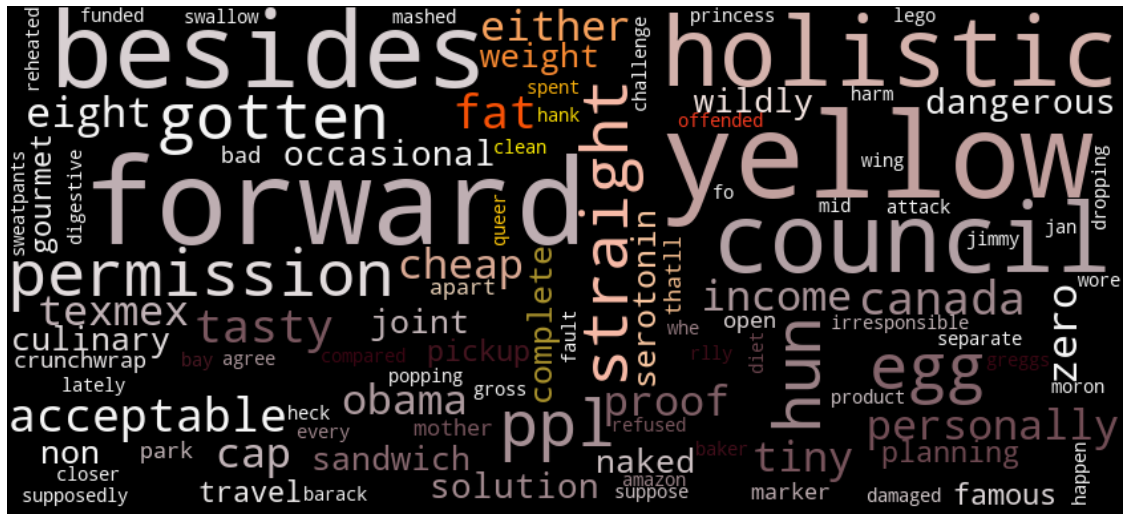

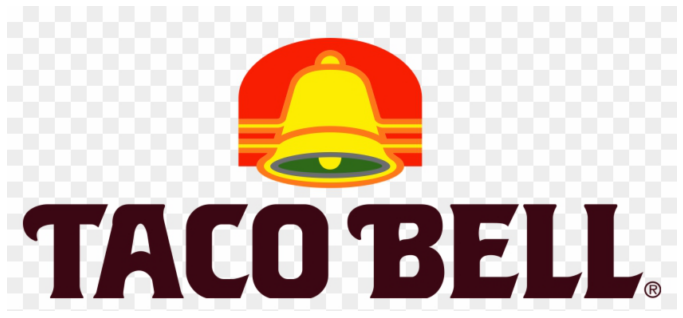

In [196]:
from os import path
from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# import os

from wordcloud import WordCloud, ImageColorGenerator

# Read the whole text.
IMG_DIR = 'twitapp/static/images/'

# read the mask image
taco_mask = np.array(Image.open(path.join(IMG_DIR, 'taco_bell_retro_clear.png')))

# stopwords = set(STOPWORDS)
# stopwords.add("said")
choices = ['love', 'hate', 'good', 'disgusting', 'awful', 'best', 'awesome', 'dinner', 'lunch', 'late', 'really']
search_item = choices[3] # Choice selection

sims = [item[0] for item in word2vec_model.wv.most_similar([search_item], topn=200)]


wc = WordCloud(background_color="black", max_words=100, mask=taco_mask)
                # contour_width=10, contour_color='grey')

# generate word cloud
simString = " ".join(sims)
wc.generate(simString)

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(90, 100)

taco_colors = ImageColorGenerator(taco_mask)

# store to file
# wc.to_file(path.join(IMG_DIR, "taco_hash.png"))

# show
plt.figure(figsize=(20,15))
plt.imshow(wc.recolor(color_func=taco_colors), interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(12,8))
plt.imshow(taco_mask, plt.cm.copper, interpolation='bilinear')
plt.axis("off")
plt.show()

## Experiment: FastText Model from gensim

* Allows for dynamic word vector lookup;
* Generally better with *syntactic* tasks than `word2Vec`, but performs very well in comparison on *semantic* tasks when datasets are larger.
* This may work with a free-form user input on the website, where users can put in their own word, and find similar words from the tweet corpus.


In [42]:
corpus = pd.read_json('/Users/ben/Benborg/ads_tweetapp/data/tokens.json')

In [43]:
corpus.head(10)

,ID,created_at,clean_words,clean_tokens
0,1462146028400885760,2021-11-20 19:49:13+00:00,"[who, ready, to, partyjoin, u, for, my, twitch...","[ready, partyjoin, u, twitch, partnerversary, ..."
1,1462146041462116360,2021-11-20 19:49:16+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
2,1462146073594576907,2021-11-20 19:49:23+00:00,"[dude, ate, mad, taco, bell, last, night]","[dude, ate, mad, taco, bell, last, night]"
3,1462146080938893316,2021-11-20 19:49:25+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
4,1462146078397063170,2021-11-20 19:49:25+00:00,"[your, current, orange, logo, look, like, a, t...","[current, orange, logo, look, like, taco, bell..."
5,1462146176451555335,2021-11-20 19:49:48+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
6,1462146295859191822,2021-11-20 19:50:16+00:00,"[trans, day, of, letting, the, uber, eats, guy...","[trans, day, letting, uber, eats, guy, hit, bl..."
7,1462146330755751941,2021-11-20 19:50:25+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
8,1462146371306278917,2021-11-20 19:50:34+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
9,1462146399387234306,2021-11-20 19:50:41+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."


In [60]:
from gensim.models.fasttext import FastText
# from gensim.test.utils import datapath

# corpus = datapath('/Users/ben/Benborg/ads_tweetapp/data/tokens.json')

model = FastText(vector_size=25, window=3, min_count=1, sg=0, epochs=30)

model.build_vocab(corpus['clean_tokens'])

print(model)


FastText(vocab=12385, vector_size=25, alpha=0.025)


In [61]:
model.train(
    corpus_iterable=corpus['clean_tokens'], epochs=model.epochs, 
    total_examples=model.corpus_count, total_words=model.corpus_total_words
)

(3670237, 4906470)

In [62]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile('/Users/ben/Benborg/ads_tweetapp/data/ft_mod.model')
model.save(fname)

In [63]:
ftModel = FastText.load('data/ft_mod.model')

In [66]:
similars = ftModel.wv.most_similar(positive=['time'], negative=['meat'], topn=25)
similars

[('timey', 0.7862846255302429),
 ('timeim', 0.7599357962608337),
 ('timeso', 0.7381833791732788),
 ('errytime', 0.7367074489593506),
 ('timeyurt', 0.6928961873054504),
 ('tim', 0.6734267473220825),
 ('ek', 0.6672163009643555),
 ('day', 0.6604926586151123),
 ('week', 0.6585836410522461),
 ('weekend', 0.65566486120224),
 ('timesspray', 0.6549878716468811),
 ('wee', 0.6513654589653015),
 ('timer', 0.647956371307373),
 ('timed', 0.6429212093353271),
 ('tokestime', 0.6405673623085022),
 ('primetime', 0.6397042274475098),
 ('yeame', 0.6390353441238403),
 ('tik', 0.6245253682136536),
 ('seek', 0.6243106722831726),
 ('empty', 0.6232162117958069),
 ('month', 0.6229041218757629),
 ('facetime', 0.6221664547920227),
 ('tacotime', 0.6165093183517456),
 ('prime', 0.6102615594863892),
 ('kek', 0.6095471978187561)]

* The **FastText** model seems to output 

## Sentiment Analysis Module